In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
import nltk.corpus
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\parvj\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [ ]:
df=pd.read_csv("Delhi-NCR Restaurants.csv")
df

,Restaurant_Name,Category,Pricing_for_2,Locality,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,Website,Address,Phone_No,Latitude,Longitude,Known_For2,Known_For22
0,Rustom's,"Parsi, Street Food, North Indian, Desserts, Be...",2100,"ITO, New Delhi",4.9,1885,4.4,1844,https://www.zomato.com/ncr/rustoms-ito-new-delhi,"Delhi Parsi Anjuman, LNJP Colony, Bahadur Shah...",9.20E+11,28.638167,77.240472,NaN,NaN
1,Cafe Lota,"Cafe, South Indian, North Indian, Beverages",1200,"Pragati Maidan, New Delhi",4.9,3748,3.9,37,https://www.zomato.com/ncr/cafe-lota-pragati-m...,"National Crafts Museum, Gate 2, Bhairon Marg, ...",9.18E+11,28.613429,77.242471,"Pondicherry Fish Curry, Coconut Rabdi, Sabudan...","Artistic Decor, The Service, Natural Ambience,..."
2,Dum-Pukht - ITC Maurya,"Mughlai, North Indian, Desserts",5000,"ITC Maurya, Chanakyapuri, New Delhi",4.9,1371,NaN,0,https://www.zomato.com/ncr/dum-pukht-itc-maury...,"ITC Maurya, Chanakyapuri, New Delhi",9.11E+11,28.598200,77.173661,"Royal ambiance and Mughlai cuisine, also recei...",NaN
3,Burma Burma,"Asian, Burmese, Bubble Tea, Desserts, Salad",1600,"Cyber Hub, DLF Cyber City, Gurgaon",4.9,2636,4.4,1238,https://www.zomato.com/ncr/burma-burma-dlf-cyb...,"Shop 6, Ground Floor, Building 8, Tower C, Cyb...",9.11E+11,28.494464,77.088532,"Coconut Milk Dessert, Honey Caviar, Kaffir Lim...","Knowledgeable Staff, Authentic, Soothing Ambie..."
4,The Big Chill,"Continental, American, Italian",1500,"Khan Market, New Delhi",4.9,6487,NaN,0,https://www.zomato.com/ncr/the-big-chill-khan-...,"68-A, Khan Market, New Delhi",9.11E+11,28.600350,77.227493,"Irish Cream Tiramisu, Penne Vodka, Mississippi...","Retro Ambience, Yummy Desserts, Big Portions, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,Bablu Chic-Inn,"Mughlai, North Indian, Chinese, Fast Food",500,"Ashok Vihar Phase 3, New Delhi",3.9,183,4.1,545,https://www.zomato.com/ncr/bablu-chic-inn-asho...,"Shop 9, Pocket B, DDA Market, Ashok Vihar Phas...",9.20E+11,28.692473,77.178004,"Great Recommendations, Tamper Proof Packaging,...",NaN
1961,Kovilakam,South Indian,350,"Dilshad Garden, New Delhi",3.9,114,NaN,1,https://www.zomato.com/ncr/kovilakam-dilshad-g...,"F-1, Lower Ground 2, Mrignaini Chowk, Dilshad ...",9.20E+11,28.684101,77.326725,"Kerala Parotta, Roasted Chicken, Chicken Curry...","Lip Smacking Food, Amazing Food, Owner, Good P..."
1962,Krips Restaurant,"North Indian, Chinese, Mughlai",900,"Basant Lok Market, Vasant Vihar, New Delhi",3.9,316,3.9,2977,https://www.zomato.com/ncr/krips-restaurant-va...,"59, Community Centre, Basant Lok Market, Vasan...",9.11E+11,28.557310,77.163943,"Excellent Food, Good Ambience, Courteous Staff...",NaN
1963,Cafe 147,"Cafe, North Indian, Chinese, Kashmiri, Rolls, ...",800,"Sainik Farms, New Delhi",3.9,120,3.8,196,https://www.zomato.com/ncr/cafe-147-sainik-far...,"Shop A1/7, Ground Floor, Main IGNOU Road, Neb ...",9.20E+11,28.510338,77.202056,"Pool, Live Music, Cafe, Environment, Good Plac...",NaN


In [ ]:
print(df.isnull().sum())

Restaurant_Name            0
Category                   0
Pricing_for_2              0
Locality                   0
Dining_Rating              0
Dining_Review_Count        0
Delivery_Rating          402
Delivery_Rating_Count      0
Website                    0
Address                    0
Phone_No                   0
Latitude                   0
Longitude                  0
Known_For2               405
Known_For22              841
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965 entries, 0 to 1964
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Restaurant_Name        1965 non-null   object 
 1   Category               1965 non-null   object 
 2   Pricing_for_2          1965 non-null   int64  
 3   Locality               1965 non-null   object 
 4   Dining_Rating          1965 non-null   float64
 5   Dining_Review_Count    1965 non-null   int64  
 6   Delivery_Rating        1563 non-null   float64
 7   Delivery_Rating_Count  1965 non-null   int64  
 8   Website                1965 non-null   object 
 9   Address                1965 non-null   object 
 10  Phone_No               1965 non-null   object 
 11  Latitude               1965 non-null   float64
 12  Longitude              1965 non-null   float64
 13  Known_For2             1560 non-null   object 
 14  Known_For22            1124 non-null   object 
dtypes: f

In [ ]:
df.describe()

,Pricing_for_2,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,Latitude,Longitude
count,1965.000000,1965.000000,1965.000000,1563.000000,1965.000000,1965.000000,1965.000000
mean,1090.687023,4.140000,721.954198,3.964299,3029.550636,28.549542,77.161570
std,934.481617,0.202147,932.618839,0.242305,6529.839896,0.784241,1.685399
min,100.000000,3.900000,3.000000,2.800000,0.000000,-5.975200,2.650463
25%,500.000000,4.000000,244.000000,3.800000,34.000000,28.496564,77.100745
50%,700.000000,4.100000,433.000000,4.000000,604.000000,28.567882,77.201558
75%,1500.000000,4.300000,842.000000,4.100000,3316.000000,28.635845,77.258408
max,8000.000000,4.900000,10100.000000,4.500000,87700.000000,29.065189,77.536009


In [ ]:
df=df.drop(['Dining_Review_Count','Delivery_Rating','Delivery_Rating_Count','Website','Address','Phone_No','Latitude','Longitude','Known_For22'],axis=1)

In [ ]:
df

,Restaurant_Name,Category,Pricing_for_2,Locality,Dining_Rating,Known_For2
0,Rustom's,"Parsi, Street Food, North Indian, Desserts, Be...",2100,"ITO, New Delhi",4.9,NaN
1,Cafe Lota,"Cafe, South Indian, North Indian, Beverages",1200,"Pragati Maidan, New Delhi",4.9,"Pondicherry Fish Curry, Coconut Rabdi, Sabudan..."
2,Dum-Pukht - ITC Maurya,"Mughlai, North Indian, Desserts",5000,"ITC Maurya, Chanakyapuri, New Delhi",4.9,"Royal ambiance and Mughlai cuisine, also recei..."
3,Burma Burma,"Asian, Burmese, Bubble Tea, Desserts, Salad",1600,"Cyber Hub, DLF Cyber City, Gurgaon",4.9,"Coconut Milk Dessert, Honey Caviar, Kaffir Lim..."
4,The Big Chill,"Continental, American, Italian",1500,"Khan Market, New Delhi",4.9,"Irish Cream Tiramisu, Penne Vodka, Mississippi..."
...,...,...,...,...,...,...
1960,Bablu Chic-Inn,"Mughlai, North Indian, Chinese, Fast Food",500,"Ashok Vihar Phase 3, New Delhi",3.9,"Great Recommendations, Tamper Proof Packaging,..."
1961,Kovilakam,South Indian,350,"Dilshad Garden, New Delhi",3.9,"Kerala Parotta, Roasted Chicken, Chicken Curry..."
1962,Krips Restaurant,"North Indian, Chinese, Mughlai",900,"Basant Lok Market, Vasant Vihar, New Delhi",3.9,"Excellent Food, Good Ambience, Courteous Staff..."
1963,Cafe 147,"Cafe, North Indian, Chinese, Kashmiri, Rolls, ...",800,"Sainik Farms, New Delhi",3.9,"Pool, Live Music, Cafe, Environment, Good Plac..."


In [ ]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.head()

,Restaurant_Name,Category,Pricing_for_2,Locality,Dining_Rating,Known_For2
0,Rustom's,"Parsi, Street Food, North Indian, Desserts, Be...",2100,"ITO, New Delhi",4.9,NaN
1,Cafe Lota,"Cafe, South Indian, North Indian, Beverages",1200,"Pragati Maidan, New Delhi",4.9,"Pondicherry Fish Curry, Coconut Rabdi, Sabudan..."
2,Dum-Pukht - ITC Maurya,"Mughlai, North Indian, Desserts",5000,"ITC Maurya, Chanakyapuri, New Delhi",4.9,"Royal ambiance and Mughlai cuisine, also recei..."
3,Burma Burma,"Asian, Burmese, Bubble Tea, Desserts, Salad",1600,"Cyber Hub, DLF Cyber City, Gurgaon",4.9,"Coconut Milk Dessert, Honey Caviar, Kaffir Lim..."
4,The Big Chill,"Continental, American, Italian",1500,"Khan Market, New Delhi",4.9,"Irish Cream Tiramisu, Penne Vodka, Mississippi..."


In [ ]:
df.isnull().sum()

Restaurant_Name      0
Category             0
Pricing_for_2        0
Locality             0
Dining_Rating        0
Known_For2         405
dtype: int64

In [ ]:
df.dropna(how='any',inplace=True)
df.head()

,Restaurant_Name,Category,Pricing_for_2,Locality,Dining_Rating,Known_For2
1,Cafe Lota,"Cafe, South Indian, North Indian, Beverages",1200,"Pragati Maidan, New Delhi",4.9,"Pondicherry Fish Curry, Coconut Rabdi, Sabudan..."
2,Dum-Pukht - ITC Maurya,"Mughlai, North Indian, Desserts",5000,"ITC Maurya, Chanakyapuri, New Delhi",4.9,"Royal ambiance and Mughlai cuisine, also recei..."
3,Burma Burma,"Asian, Burmese, Bubble Tea, Desserts, Salad",1600,"Cyber Hub, DLF Cyber City, Gurgaon",4.9,"Coconut Milk Dessert, Honey Caviar, Kaffir Lim..."
4,The Big Chill,"Continental, American, Italian",1500,"Khan Market, New Delhi",4.9,"Irish Cream Tiramisu, Penne Vodka, Mississippi..."
5,Carnatic Cafe,South Indian,600,"Lodhi Colony, New Delhi",4.9,"Malleshwari Dosa, Benne Khali Dosa, Obbattu, R..."


In [ ]:
df=df.rename(columns={'Restaurant_Name':'name','Category':'cuisines','Pricing_for_2':'cost','Locality':'location', 'Dining_Rating':'rating', 'Known_For2':'reviews_list'})

In [ ]:
df.head()

,name,cuisines,cost,location,rating,reviews_list
1,Cafe Lota,"Cafe, South Indian, North Indian, Beverages",1200,"Pragati Maidan, New Delhi",4.9,"Pondicherry Fish Curry, Coconut Rabdi, Sabudan..."
2,Dum-Pukht - ITC Maurya,"Mughlai, North Indian, Desserts",5000,"ITC Maurya, Chanakyapuri, New Delhi",4.9,"Royal ambiance and Mughlai cuisine, also recei..."
3,Burma Burma,"Asian, Burmese, Bubble Tea, Desserts, Salad",1600,"Cyber Hub, DLF Cyber City, Gurgaon",4.9,"Coconut Milk Dessert, Honey Caviar, Kaffir Lim..."
4,The Big Chill,"Continental, American, Italian",1500,"Khan Market, New Delhi",4.9,"Irish Cream Tiramisu, Penne Vodka, Mississippi..."
5,Carnatic Cafe,South Indian,600,"Lodhi Colony, New Delhi",4.9,"Malleshwari Dosa, Benne Khali Dosa, Obbattu, R..."


In [ ]:
df.name=df.name.apply(lambda x:x.title())

In [ ]:
df['cost']=df['cost'].astype(float)

In [ ]:
restaurant=list(df['name'].unique())
df['Mean rating'] = 0
for i in range(len(restaurant)):
    df['Mean rating'][df['name'] == restaurant[i]] = df['rating'][df['name'] == restaurant[i]].mean()

In [ ]:
df

,name,cuisines,cost,location,rating,reviews_list,Mean rating
1,Cafe Lota,"Cafe, South Indian, North Indian, Beverages",1200.0,"Pragati Maidan, New Delhi",4.9,"Pondicherry Fish Curry, Coconut Rabdi, Sabudan...",4.9
2,Dum-Pukht - Itc Maurya,"Mughlai, North Indian, Desserts",5000.0,"ITC Maurya, Chanakyapuri, New Delhi",4.9,"Royal ambiance and Mughlai cuisine, also recei...",4.9
3,Burma Burma,"Asian, Burmese, Bubble Tea, Desserts, Salad",1600.0,"Cyber Hub, DLF Cyber City, Gurgaon",4.9,"Coconut Milk Dessert, Honey Caviar, Kaffir Lim...",4.9
4,The Big Chill,"Continental, American, Italian",1500.0,"Khan Market, New Delhi",4.9,"Irish Cream Tiramisu, Penne Vodka, Mississippi...",4.9
5,Carnatic Cafe,South Indian,600.0,"Lodhi Colony, New Delhi",4.9,"Malleshwari Dosa, Benne Khali Dosa, Obbattu, R...",4.9
...,...,...,...,...,...,...,...
1960,Bablu Chic-Inn,"Mughlai, North Indian, Chinese, Fast Food",500.0,"Ashok Vihar Phase 3, New Delhi",3.9,"Great Recommendations, Tamper Proof Packaging,...",3.9
1961,Kovilakam,South Indian,350.0,"Dilshad Garden, New Delhi",3.9,"Kerala Parotta, Roasted Chicken, Chicken Curry...",3.9
1962,Krips Restaurant,"North Indian, Chinese, Mughlai",900.0,"Basant Lok Market, Vasant Vihar, New Delhi",3.9,"Excellent Food, Good Ambience, Courteous Staff...",3.9
1963,Cafe 147,"Cafe, North Indian, Chinese, Kashmiri, Rolls, ...",800.0,"Sainik Farms, New Delhi",3.9,"Pool, Live Music, Cafe, Environment, Good Plac...",3.9


In [ ]:
df.loc[df.name=="Cafe Lota"]

,name,cuisines,cost,location,rating,reviews_list,Mean rating
1,Cafe Lota,"Cafe, South Indian, North Indian, Beverages",1200.0,"Pragati Maidan, New Delhi",4.9,"Pondicherry Fish Curry, Coconut Rabdi, Sabudan...",4.9


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (1,5))
df[['Mean rating']] = scaler.fit_transform(df[['Mean rating']]).round(2)

In [ ]:
df.head()

,name,cuisines,cost,location,rating,reviews_list,Mean rating
1,Cafe Lota,"Cafe, South Indian, North Indian, Beverages",1200.0,"Pragati Maidan, New Delhi",4.9,"Pondicherry Fish Curry, Coconut Rabdi, Sabudan...",5.0
2,Dum-Pukht - Itc Maurya,"Mughlai, North Indian, Desserts",5000.0,"ITC Maurya, Chanakyapuri, New Delhi",4.9,"Royal ambiance and Mughlai cuisine, also recei...",5.0
3,Burma Burma,"Asian, Burmese, Bubble Tea, Desserts, Salad",1600.0,"Cyber Hub, DLF Cyber City, Gurgaon",4.9,"Coconut Milk Dessert, Honey Caviar, Kaffir Lim...",5.0
4,The Big Chill,"Continental, American, Italian",1500.0,"Khan Market, New Delhi",4.9,"Irish Cream Tiramisu, Penne Vodka, Mississippi...",5.0
5,Carnatic Cafe,South Indian,600.0,"Lodhi Colony, New Delhi",4.9,"Malleshwari Dosa, Benne Khali Dosa, Obbattu, R...",5.0


In [ ]:
df[['reviews_list', 'cuisines']].head()

,reviews_list,cuisines
1,"Pondicherry Fish Curry, Coconut Rabdi, Sabudan...","Cafe, South Indian, North Indian, Beverages"
2,"Royal ambiance and Mughlai cuisine, also recei...","Mughlai, North Indian, Desserts"
3,"Coconut Milk Dessert, Honey Caviar, Kaffir Lim...","Asian, Burmese, Bubble Tea, Desserts, Salad"
4,"Irish Cream Tiramisu, Penne Vodka, Mississippi...","Continental, American, Italian"
5,"Malleshwari Dosa, Benne Khali Dosa, Obbattu, R...",South Indian


In [ ]:
df["reviews_list"] = df["reviews_list"].str.lower()

#Removal of Punctuations
import string
punc = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punc))

df["reviews_list"] = df["reviews_list"].apply(lambda text: remove_punctuation(text))

#Removal of Stopwords
Stopwords = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in Stopwords])

df["reviews_list"] = df["reviews_list"].apply(lambda text: remove_stopwords(text))

#Removal of URLS
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df["reviews_list"] = df["reviews_list"].apply(lambda text: remove_urls(text))
df[['reviews_list', 'cuisines']].head()

,reviews_list,cuisines
1,pondicherry fish curry coconut rabdi sabudana ...,"Cafe, South Indian, North Indian, Beverages"
2,royal ambiance mughlai cuisine also received t...,"Mughlai, North Indian, Desserts"
3,coconut milk dessert honey caviar kaffir lime ...,"Asian, Burmese, Bubble Tea, Desserts, Salad"
4,irish cream tiramisu penne vodka mississippi m...,"Continental, American, Italian"
5,malleshwari dosa benne khali dosa obbattu raag...,South Indian


##**Exploratory Data Analysis(EDA)**

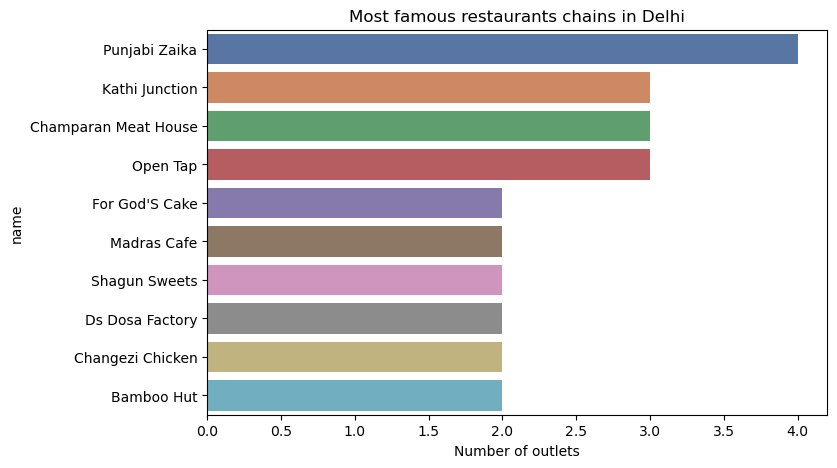

In [ ]:
plt.figure(figsize=(8,5))
chains=df['name'].value_counts()[:10]
sb.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Delhi")
plt.xlabel("Number of outlets")
plt.show()

Text(0.5, 1.0, 'Distribution(count) of Restaurant rating')

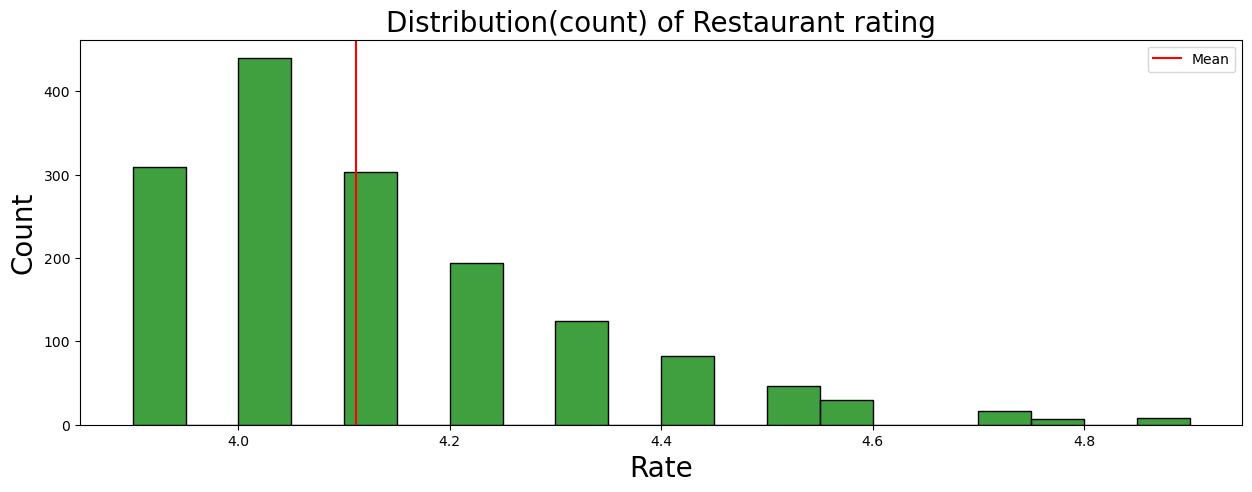

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
sb.histplot(df.rating,kde=False,color = 'g',ax =ax,bins=20)
ax.axvline(df.rating.mean(), 0, 1, color='r', label='Mean')
ax.legend()
ax.set_ylabel('Count',size=20)
ax.set_xlabel('Rate',size=20)
ax.set_title('Distribution(count) of Restaurant rating',size=20)

Text(0.5, 1.0, 'Top Rated 10 Restaurants')

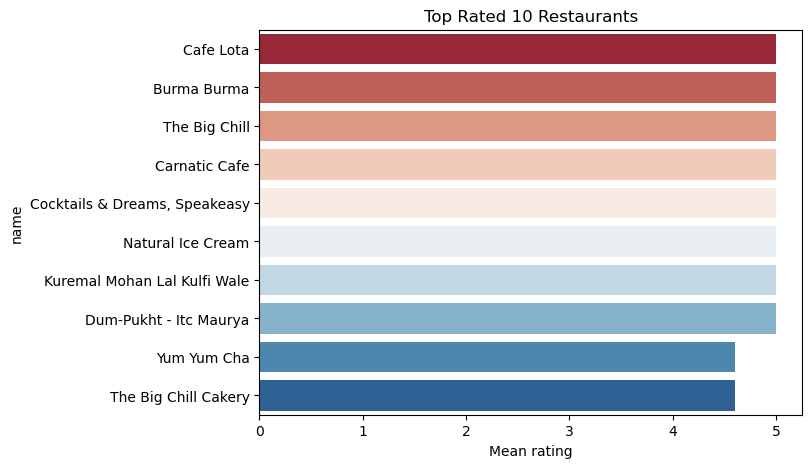

In [ ]:
df_rating = df.drop_duplicates(subset='name')
df_rating = df_rating.sort_values(by='Mean rating', ascending=False).head(10)
plt.figure(figsize=(7,5))
sb.barplot(data=df_rating, x='Mean rating', y='name', palette='RdBu')
plt.title('Top Rated 10 Restaurants')

In [ ]:
def get_top_words(column, top_nu_of_words, nu_of_word):
    vec = CountVectorizer(ngram_range= nu_of_word, stop_words='english')
    bag_of_words = vec.fit_transform(column)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top_nu_of_words]

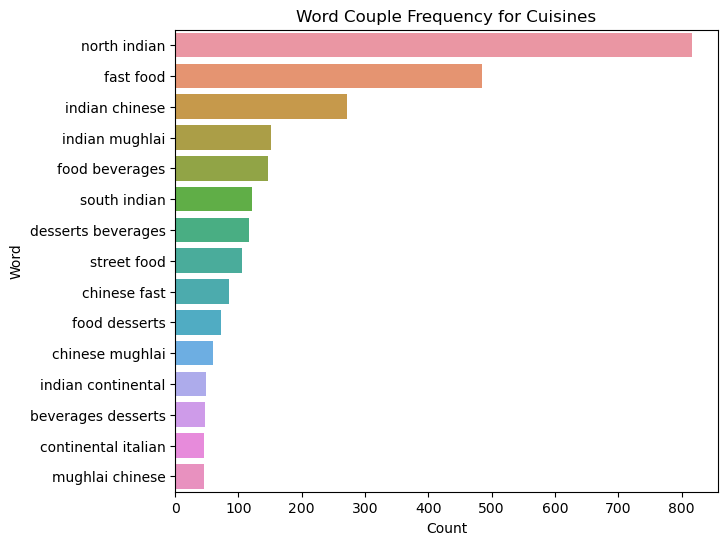

In [ ]:
lst = get_top_words(df['cuisines'], 15, (2, 2))
df_words = pd.DataFrame(lst, columns=['Word', 'Count'])
plt.figure(figsize=(7, 6))
sb.barplot(data=df_words, x='Count', y='Word')
plt.title('Word Couple Frequency for Cuisines');